In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import adjusted_rand_score
from scipy.stats import entropy as scipy_entropy
from scipy.optimize import linear_sum_assignment as linear_assignment

In [25]:
# 讀取數據
banana_df = pd.read_csv('D:\\TEST3\\banana.csv')  

In [26]:
# Extract features and labels
X_banana = banana_df.drop('class', axis=1)
y_banana = banana_df['class']

In [27]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_banana)

In [28]:
# 開始計時
start_time = time.time()

In [29]:
# K-means 群聚
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(banana_df[['x', 'y']])

c:\Users\brain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


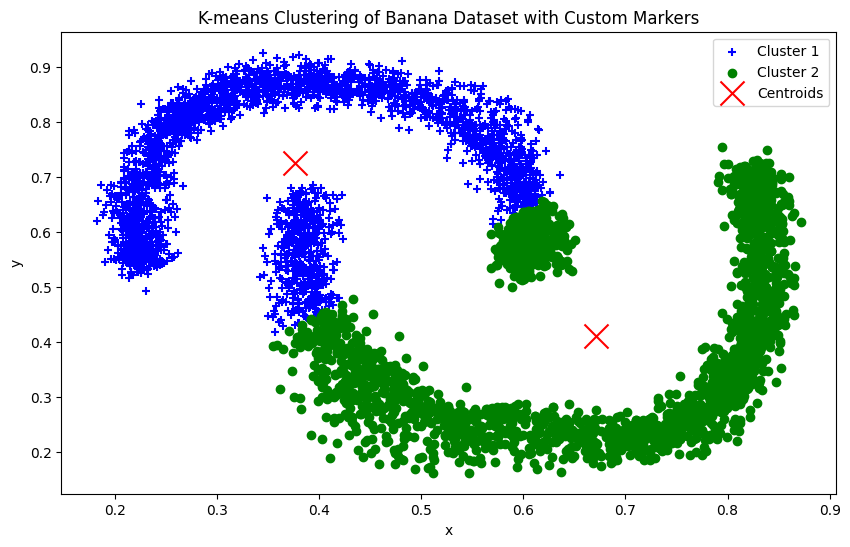

In [30]:
# 繪製散點圖
plt.figure(figsize=(10, 6))
plt.scatter(banana_df['x'][kmeans_labels == 0], banana_df['y'][kmeans_labels == 0], c='blue', marker='+', label='Cluster 1')
plt.scatter(banana_df['x'][kmeans_labels == 1], banana_df['y'][kmeans_labels == 1], c='green', marker='o', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('K-means Clustering of Banana Dataset with Custom Markers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

c:\Users\brain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\brain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

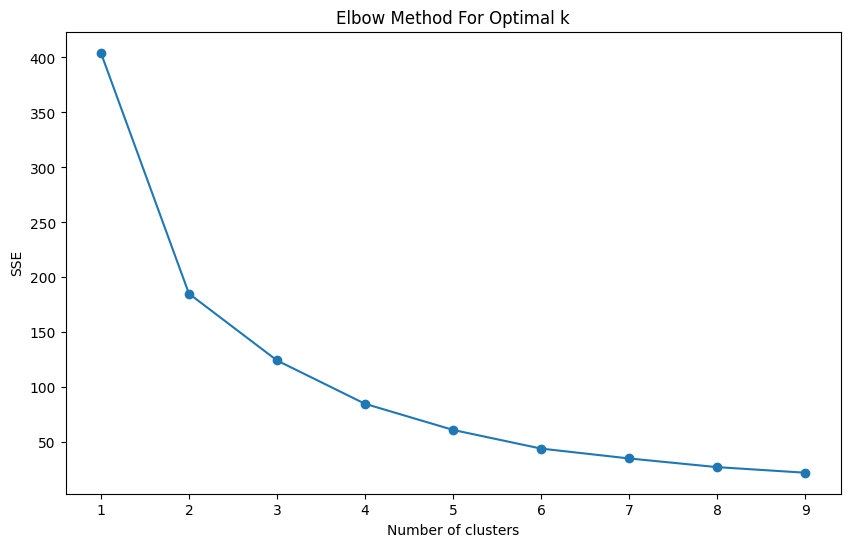

In [31]:
sse_values = []
for k in range(1, 10):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(banana_df[['x', 'y']])
    sse_values.append(kmeans_temp.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), sse_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

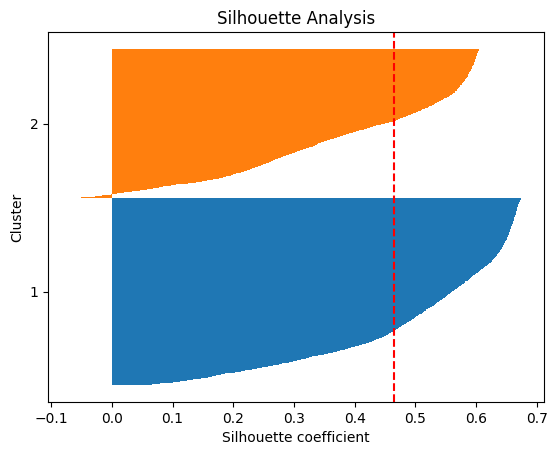

In [32]:
silhouette_vals = silhouette_samples(banana_df[['x', 'y']], kmeans_labels)
y_ticks = []
y_lower = y_upper = 0
for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=silhouette_score(banana_df[['x', 'y']], kmeans_labels), color="red", linestyle="--")
plt.title('Silhouette Analysis')
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster')
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.show()

In [33]:
# 計算 SSE
sse = kmeans.inertia_

# 計算 ARI (Adjusted Rand Index)
ari = adjusted_rand_score(banana_df['class'], kmeans_labels)

# 計算熵
cluster_entropy = [scipy_entropy(banana_df[kmeans_labels == i]['class'].value_counts(normalize=True)) for i in range(kmeans.n_clusters)]
mean_entropy = np.mean(cluster_entropy)


In [34]:
# 使用匈牙利算法計算準確度
def calculate_accuracy(true_labels, predicted_labels):
    D = max(predicted_labels.max(), true_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(predicted_labels.size):
        w[predicted_labels[i], true_labels[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in zip(*ind)]) / predicted_labels.size

accuracy = calculate_accuracy(banana_df['class'], kmeans_labels)

In [35]:
# 停止計時
end_time = time.time()
kmeans_elapsed_time = end_time - start_time

In [36]:
# 輸出結果
print("SSE: ", sse)
print("ARI: ", ari)
print("Mean Entropy: ", mean_entropy)
print("Accuracy: ", accuracy)
print("K-means Clustering Elapsed Time: {:.2f} seconds".format(kmeans_elapsed_time))

SSE:  185.20243898614177
ARI:  0.431563873187541
Mean Entropy:  0.4553735886237091
Accuracy:  0.8285179796300145
K-means Clustering Elapsed Time: 5.72 seconds
